In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [71]:
OUT_FILE_LOC = 'examples/bangor_2015_multilayer/outputs/bangor_2015_hb_ww/bangor_wheat/latest/bangor_wheat-bangor_2015_hb_ww_out.csv'
nL = 4
nP = 3

In [72]:
df = pd.read_csv(OUT_FILE_LOC)
df.head()

,Unnamed: 0,dd,ts_c,par,td,lai,sai,dvi,photoperiod,PARsun,...,LAIsunfrac,component_LAI,V_cmax,J_max,R_d,R_dc,total_emerged_leaves,leaf_pop_distribution,growing_populations,layer_lai
0,0,71,5.36,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
1,1,71,5.85,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
2,2,71,5.88,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
3,3,71,5.19,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"
4,4,71,5.90,0.0,0.0,0.0,5.657143,-1.0,12.701909,0.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]\n [0. 0....,"[False, False, False]","[0.0, 0.0, 0.0, 0.0]"


In [73]:
df.columns

Index(['Unnamed: 0', 'dd', 'ts_c', 'par', 'td', 'lai', 'sai', 'dvi',
       'photoperiod', 'PARsun', 'PARshade', 'A_n', 'A_n_limit_factor', 'fst',
       'fst_acc', 'rsto_l', 'gsto_l', 'gsto', 'gsto_bulk', 'gsto_canopy',
       'A_n_canopy', 'c_root', 'c_stem', 'c_leaf', 'c_harv', 'c_resv', 'npp',
       'npp_acc', 'fO3_d', 'fO3_h', 'c_i', 'td_dd', 'o3_ppb', 'o3_nmol_m3',
       'canopy_height', 'o3_ppb_i', 'pody', 'pod0', 'precip_acc', 'swp', 'asw',
       'smd', 'sn', 'ei', 'et', 'pet', 'es', 'ei_acc', 'et_acc', 'pet_acc',
       'es_acc', 'f_phen', 'leaf_f_phen', 'f_light', 'leaf_f_light', 'f_temp',
       'f_VPD', 'f_SW', 'f_O3', 'ustar', 'rsto_c', 'ra', 'rb', 'rsur', 'rinc',
       'V_cmax_25', 'J_max_25', 'f_LS', 'LAIsunfrac', 'component_LAI',
       'V_cmax', 'J_max', 'R_d', 'R_dc', 'total_emerged_leaves',
       'leaf_pop_distribution', 'growing_populations', 'layer_lai'],
      dtype='object')

In [74]:
# split leaf_pop_distribution column into multi d array
import re
r_pattern = "\[" + "\n ".join(["\[" + " +?".join(["([\d\.e+-]+?)" for _ in range(nP)]) + " *?\]" for _ in range(nL)]) + "\]"

def split_leaf_lai(r):
    try:
        return np.array(re.search(r_pattern, r).groups()).reshape((nL,nP)).astype(float)
    except ValueError as e:
        print("Row failed value")
        print(r)
        raise e
    except AttributeError as e:
        print("row failed (Could not find regex groups)")
        print(r)
        raise e
        

print(df['leaf_pop_distribution'].iloc[1000])
out = split_leaf_lai(df['leaf_pop_distribution'].iloc[1000])
print(out.shape)
print(out)

leaf_pops_lai = np.array([split_leaf_lai(i) for i in df['leaf_pop_distribution']])
leaf_pops_lai.shape, leaf_pops_lai[0]

[[0.10035014 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
(4, 3)
[[0.10035014 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


((3672, 4, 3),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [75]:
# split growing_populations column into multi d array
import re
r_pattern = "\[(?:(\w*), *?)(?:(\w*), *?) (\w*)\]"
print(r_pattern)
print(df['growing_populations'].iloc[1000])
print(re.search(r_pattern, df['growing_populations'].iloc[1000]).groups())
def split_leaf_lai(r):
    try:
        return np.array([1 if g == "True" else 0 for g in re.search(r_pattern, r).groups()])
    except ValueError as e:
        print("Row failed value")
        print(r)
        raise e
    except AttributeError as e:
        print("row failed (Could not find regex groups)")
        print(r)
        raise e
        

print(df['growing_populations'].iloc[1000])
out = split_leaf_lai(df['growing_populations'].iloc[1000])
print(out.shape)
print(out)

# leaf_pops_lai = np.array([split_leaf_lai(i) for i in df['growing_populations']])
growing_populations = pd.DataFrame([split_leaf_lai(i) for i in df['growing_populations']])

growing_populations.head()

\[(?:(\w*), *?)(?:(\w*), *?) (\w*)\]
[True, False, False]
('True', 'False', 'False')
[True, False, False]
(3,)
[1 0 0]


,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


# Analyse emergence
Leaf population start of emergenece is dstributed between the plant emergence and the flag leaf emergence.
td_dd for each population is the thermal time since that population emerged.
Populations continue to grow while their td_dd is between 0 and t_lem.
We currently set t_lem either by the phyllochron at plant emergence or as a constant in the config.
Plant leaf carbon is distributed between all the leaf populations that are currently emerging/growing.

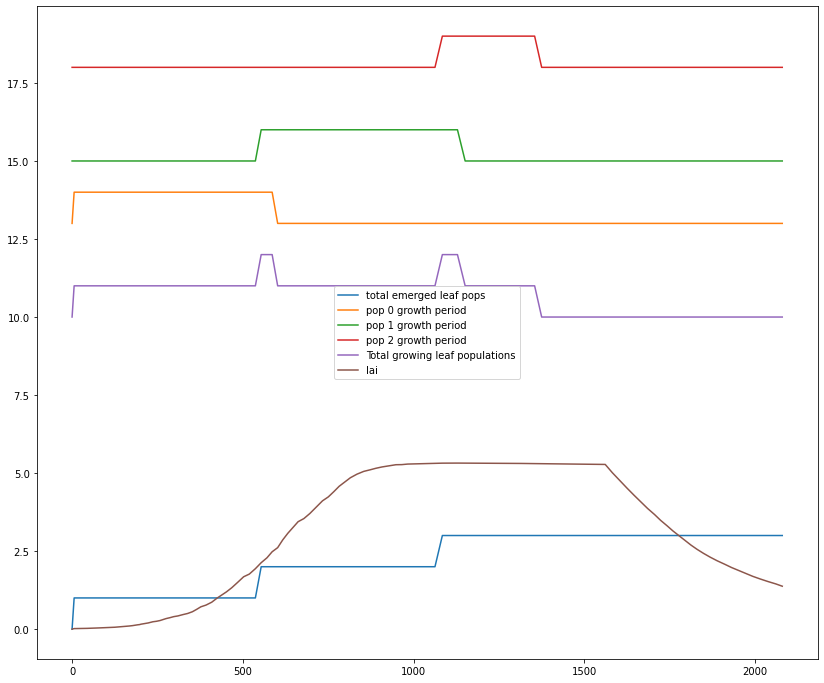

In [76]:
plt.figure(figsize=(14,12))
td = df['td_dd'].values
plt.plot(td, df['total_emerged_leaves'], label="total emerged leaf pops")

plt.plot(td, growing_populations.values[:,0] +13, label="pop 0 growth period")
plt.plot(td, growing_populations.values[:,1] +15, label="pop 1 growth period")
plt.plot(td, growing_populations.values[:,2] +18, label="pop 2 growth period")

plt.plot(td, growing_populations.sum(axis=1) + 10, label='Total growing leaf populations')
plt.plot(td, df['lai'], label="lai")
plt.legend()
plt.show()

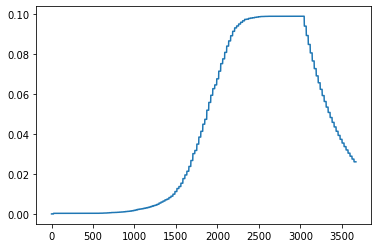

In [77]:
c_leaf = df['c_leaf']
plt.plot(c_leaf)

In [78]:
from pyDO3SE.plugins.carbon_allocation.calculations import calc_LAI_from_DVI_and_carbon

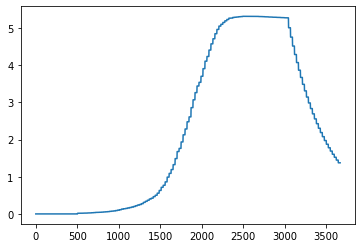

In [79]:
lai = [calc_LAI_from_DVI_and_carbon(d, c, 27.3,-0.0507, 3) for d, c in zip(df['dvi'], df['c_leaf'])]
plt.plot(lai)

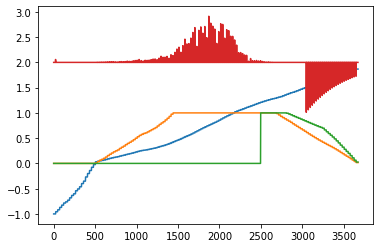

In [99]:
# c_diff = np.array([1 if (a - b)<0 else 0 for a, b in zip(df['c_leaf'], df['c_leaf'].iloc[1:])])
c_diff = np.array([(b-a) for a, b in zip(df['c_leaf'], df['c_leaf'].iloc[1:])])
plt.plot(df['dvi'])
plt.plot(df['f_phen'])
plt.plot(df['leaf_f_phen'])
plt.plot((c_diff*200)+2)

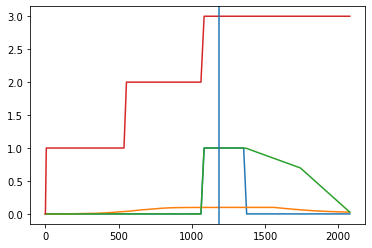

In [81]:
plt.plot(td, growing_populations.values[:,2], label="pop 2 growth period")
plt.plot(td, df['c_leaf'])
plt.plot(td, df['leaf_f_phen'])
plt.plot(td, df['total_emerged_leaves'], label="total emerged leaf pops")
plt.axvline(1188)
